# Hough Line Transform 
https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html

*   The Hough Line Transform is a transform used to detect straight lines.

*   To apply the Transform, first an edge detection pre-processing is desirable.



In [ ]:
import requests
"""Download da imagem de teste"""
img_data = requests.get('https://raw.githubusercontent.com/opencv/opencv/3.4/samples/data/sudoku.png').content

with open('sudoku.png', 'wb') as handler:
    handler.write(img_data)

(62, 1, 2)
[[361.          1.5707964]]
[[ 96 361 442 361]]


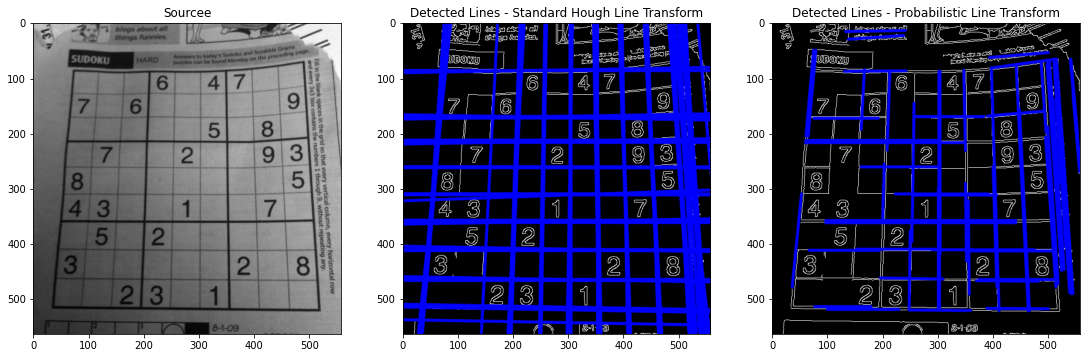

In [ ]:
"""
@file hough_lines.py
@brief This program demonstrates line finding with the Hough transform
"""
import sys
import math
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow # for image display
import matplotlib.pyplot as plt

def main():
    
    default_file = 'sudoku.png'
    # default_file = 'building.jpg'
    # filename = argv[0] if len(argv) > 0 else default_file
    # Loads an image
    src = cv.imread(default_file, cv.IMREAD_GRAYSCALE)
    # Check if image is loaded fine
    if src is None:
        print ('Error opening image!')
        print ('Usage: hough_lines.py [image_name -- default ' + default_file + '] \n')
        return -1
  
    dst = cv.Canny(src, 50, 200)

    # Copy edges to the images that will display the results in BGR
    cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
    cdstP = np.copy(cdst)

    lines = cv.HoughLines(dst, rho=1, theta = np.pi / 180, threshold=150)
    print (lines.shape)
    print (lines[0])

    # https://stackoverflow.com/questions/62585845/why-add-and-subtract-1000-for-hough-line-transformation
    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv.line(cdst, pt1, pt2, (0,0,255),3, cv.LINE_AA)
    
    
    linesP = cv.HoughLinesP(dst, rho=1, theta=np.pi / 180, threshold=50, minLineLength=100, maxLineGap=10)
    print(linesP[0])
    if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)
    
    plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

    # img = cv2.imread("left01.jpg", 0)
    
    plt.subplot(151), plt.imshow(src, "gray"), plt.title("Sourcee")   
    plt.subplot(152), plt.imshow(cdst), plt.title("Detected Lines - Standard Hough Line Transform")
    plt.subplot(153), plt.imshow(cdstP), plt.title("Detected Lines - Probabilistic Line Transform")
    plt.show()

if __name__ == "__main__":
    main()

In [ ]:
import requests
"""Download da imagem de teste"""
img_data = requests.get('https://images.fineartamerica.com/images/artworkimages/mediumlarge/2/hotel-windows-christian-mueller.jpg').content

with open('building.jpg', 'wb') as handler:
    handler.write(img_data)

(55, 1, 2)
[[484.          1.5707964]]
[[  1 486 180 486]]


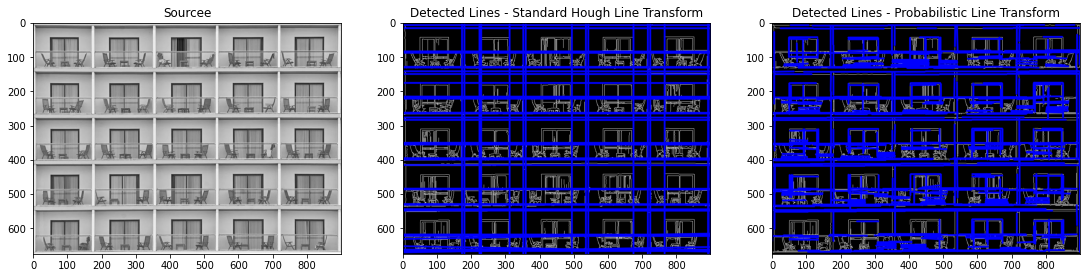

In [ ]:
"""
@file hough_lines.py
@brief This program demonstrates line finding with the Hough transform
"""
import sys
import math
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow # for image display
import matplotlib.pyplot as plt

def main():
    
    # default_file = 'sudoku.png'
    default_file = 'building.jpg'
    # filename = argv[0] if len(argv) > 0 else default_file
    # Loads an image
    src = cv.imread(default_file, cv.IMREAD_GRAYSCALE)
    # Check if image is loaded fine
    if src is None:
        print ('Error opening image!')
        print ('Usage: hough_lines.py [image_name -- default ' + default_file + '] \n')
        return -1
  
    dst = cv.Canny(src, 50, 200)

    # Copy edges to the images that will display the results in BGR
    cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
    cdstP = np.copy(cdst)

    # lines = cv.HoughLines(dst, rho=1, theta = np.pi / 180, threshold=150)
    lines = cv.HoughLines(dst, rho=1, theta = np.pi / 180, threshold=300)
    print (lines.shape)
    print (lines[0])

    # https://stackoverflow.com/questions/62585845/why-add-and-subtract-1000-for-hough-line-transformation
    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv.line(cdst, pt1, pt2, (0,0,255),3, cv.LINE_AA)
    
    linesP = cv.HoughLinesP(dst, rho=1, theta=np.pi / 180, threshold=50, minLineLength=50, maxLineGap=10)

    # linesP = cv.HoughLinesP(dst, rho=1, theta=np.pi / 180, threshold=150, minLineLength=80, maxLineGap=10)
    print(linesP[0])
    if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)
    
    plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

    # img = cv2.imread("left01.jpg", 0)
    
    plt.subplot(151), plt.imshow(src, "gray"), plt.title("Sourcee")   
    plt.subplot(152), plt.imshow(cdst), plt.title("Detected Lines - Standard Hough Line Transform")
    plt.subplot(153), plt.imshow(cdstP), plt.title("Detected Lines - Probabilistic Line Transform")
    plt.show()

if __name__ == "__main__":
    main()